In [3]:
from sklearn import datasets
import pandas
import numpy

from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [5]:
iris_dataset = datasets.load_iris()
type(iris_dataset)

sklearn.utils.Bunch

In [8]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
type(iris_dataset.data)

numpy.ndarray

In [10]:
iris_dataset.data.shape

(150, 4)

In [11]:
iris_dataset.target_names
#0 == setosa  1==versicolor  2==virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
#Exploratory data analysis
X_values = iris_dataset.data
Y_values = iris_dataset.target
feature_names_for_columns = iris_dataset.feature_names
df = pandas.DataFrame(X_values , columns=feature_names_for_columns)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


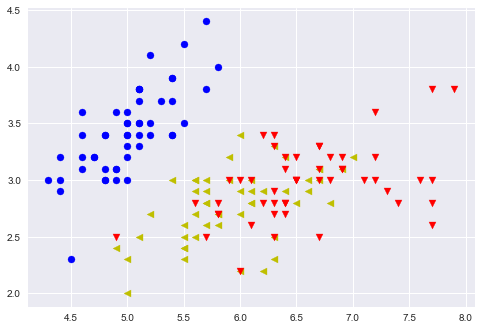

In [22]:
setosa_filter = (Y_values == 0)
setosa_data = df.loc[setosa_filter,:]
versicolor_filter = (Y_values == 1)
versicolor_data = df.loc[versicolor_filter,:]
virginica_filter = (Y_values == 2)
virginica_data = df.loc[virginica_filter,:]

plt.scatter(setosa_data['sepal length (cm)'],setosa_data['sepal width (cm)'],marker='o',c='b')
plt.scatter(versicolor_data['sepal length (cm)'],versicolor_data['sepal width (cm)'],marker='<',c='y')
plt.scatter(virginica_data['sepal length (cm)'],virginica_data['sepal width (cm)'],marker='v',c='r')

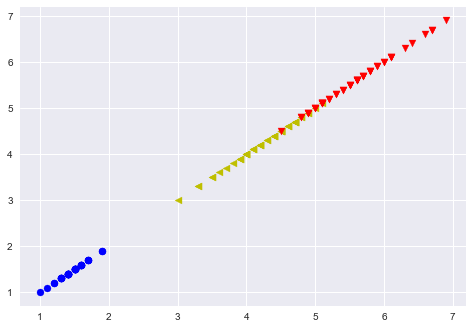

In [23]:
plt.scatter(setosa_data['petal length (cm)'],setosa_data['petal length (cm)'],marker='o',c='b')
plt.scatter(versicolor_data['petal length (cm)'],versicolor_data['petal length (cm)'],marker='<',c='y')
plt.scatter(virginica_data['petal length (cm)'],virginica_data['petal length (cm)'],marker='v',c='r')

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_values,Y_values)

KNeighborsClassifier()

In [30]:
prediction_lable = knn.predict(numpy.array([[5.6,2.8,3.1,1.1]]))
print(iris_dataset.target_names[prediction_lable])

['versicolor']


Until here, we trained our model and predict with it
Now we want to find the accuracy of our training, so we split our data to test and train sets for finding it out !

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_values,Y_values,test_size = 0.25,random_state = 21 )

In [36]:
knn.fit(X_train,Y_train)

In [37]:
knn.score(X_test,Y_test)

0.9473684210526315

In [ ]:
#for finding best k value, we can use for loop to find good k value base on the result score
#end